In [1]:
import urllib.request
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from itables import show

Somministrazioni dei vaccini anti Covid-19 in Lombardia https://hub.dati.lombardia.it/resource/xdg8-8qek
Licenza: CC-BY

In [2]:
url = 'https://hub.dati.lombardia.it/resource/xdg8-8qek.csv'
filename = 'vaccini.csv'
urllib.request.urlretrieve(url, filename)

('vaccini.csv', <http.client.HTTPMessage at 0x7fb620346c50>)

In [3]:
pop = gpd.read_file('comuni_lomb_pop.geojson')
vac = pd.read_csv('vaccini.csv')

In [4]:
pop_vac = pop.merge(vac, how='left', right_on='codistat_comune_dom', left_on='COD_COM')

In [5]:
pop_vac['%1Dose'] = 100*pop_vac['tot_dose1']/pop_vac['POP']
pop_vac['%2Dose'] = 100*pop_vac['tot_dose2']/pop_vac['POP']

/Users/Lorenzo/opt/anaconda3/envs/gis/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


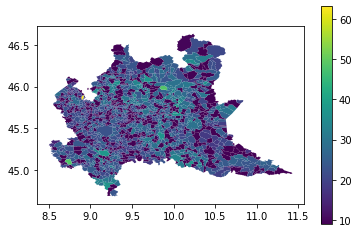

In [6]:
pop_vac.plot(column='%1Dose', legend=True)

/Users/Lorenzo/opt/anaconda3/envs/gis/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


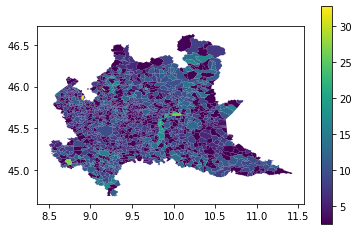

In [7]:
pop_vac.plot(column='%2Dose', legend=True)

In [8]:
pop_vac.to_file("pop_vac.geojson", driver='GeoJSON')
pop_vac.drop('geometry',axis=1).drop('codistat_comune_dom',axis=1).drop('comune_dom',axis=1).to_csv('pop_vac.csv') 

ERROR:fiona._env:pop_vac.geojson: No such file or directory


In [9]:
fin = pd.read_csv('pop_vac.csv')
show(fin, maxBytes=0)

<IPython.core.display.Javascript object>

Unnamed: 0,COD_COM,COMUNE,POP,provincia_dom,tot_dose1,tot_dose2,%1Dose,%2Dose
